# Desafio evaluado S6

* default: Variable binaria. Registra si el cliente entró en morosidad o no.
* income: Ingreso promedio declarado por el cliente.
* balance: Total de saldo en la cuenta de crédito.
* student: Variable binaria. Registra si el cliente es estudiante o no.

### Desafío 1: Preparación del ambiente de trabajo

In [257]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
plt.style.use('seaborn') 
plt.rcParams["figure.figsize"] = (5,5) # Tamaño gráficos
plt.rcParams["figure.dpi"] = 100 # resolución gráficos

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_curve

In [258]:
df = pd.read_csv('default_credit.csv')
df.head()

,index,default,student,balance,income
0,1,No,No,729.526495,44361.625074
1,2,No,Yes,817.180407,12106.134700
2,3,No,No,1073.549164,31767.138947
3,4,No,No,529.250605,35704.493935
4,5,No,No,785.655883,38463.495879


In [259]:
df = df.drop('index', axis=1)

In [260]:
df.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


In [261]:
var_categoricas = ['default', 'student']
var_numericas = ['balance' , 'income']

In [262]:
for i in var_categoricas:
    print(f'''
{i}
{df[i].value_counts('%')}''')


default
No     0.9667
Yes    0.0333
Name: default, dtype: float64

student
No     0.7056
Yes    0.2944
Name: student, dtype: float64


In [263]:
df.describe()

,balance,income
count,10000.000000,10000.000000
mean,835.374886,33516.981876
std,483.714985,13336.639563
min,0.000000,771.967729
25%,481.731105,21340.462903
50%,823.636973,34552.644802
75%,1166.308386,43807.729272
max,2654.322576,73554.233495


In [264]:
df.isna().value_counts()

default  student  balance  income
False    False    False    False     10000
dtype: int64

### Desafío 2: Análisis exploratorio
* Explore las principales relaciones entre las variables. Utilizando los métodos boxplot y lmplot de seaborn implemente los siguientes gráficos.
    - Un boxplot del balance total de las cuentas, segmentado por el status de estudiante.
    - Un boxplot del ingreso total de cada cliente, segmentado por el status de estudiante.
    - Un boxplot del balance total de las cuentas, segmentado por el status de default.
    - Un boxplot del ingreso total de cada cliente, segmentado por el status de default.

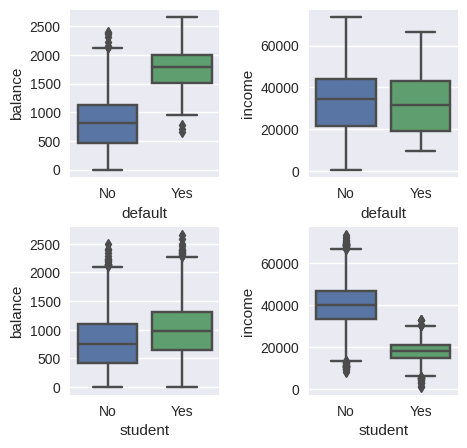

In [265]:
n=1
for i in var_categoricas:
    for j in var_numericas:
        plt.subplot(2,2, n)
        plt.subplots_adjust(wspace=0.6, hspace=0.3)
        sns.boxplot(x=i, y=j, data=df)
        n+=1
        


* En default balance, observamos la mediana de quienes se encuentran en morosidad  con respecto al saldo en su cuenta de credito muy por sobre la mediana de su opuesto. Por el lado de income vemos un comportamiento similar entre ambas categorías con mucha dispersion en los datos.
* Para Student, se nota dispersion no mayor con outliers presentes, y una concentracion de datos y medianas apuntando a un lugar similar. En income una gran diferencia de medianas con gran dispersion para quienes no se encuentran en morosidad en todo rango de ingresos.

* 
    - Un diagrama de dispersión entre balance e income, segmentado por el status de estudiante.
    - Un diagrama de dispersión entre balance e income, segmentado por el status de default.

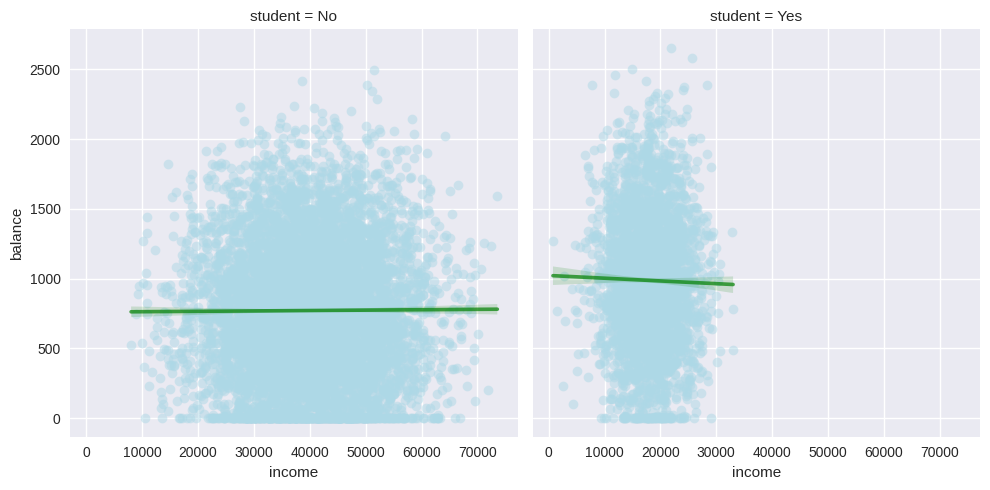

In [266]:
sns.lmplot(data=df,y='balance', x='income', col='student',scatter_kws={'alpha':0.5, 'color':'lightblue'},line_kws={'alpha':0.7,'color':'green'})

* Apreciando el grafico no se nota mayor significancia en las variables, sin embargo llama la atencion la tendencia negativa cuando se trata de estudiantes vs cuando no. Probablemente esto nos sea desfavorable si queremos estudiar la relacion entre balance vs income para student.

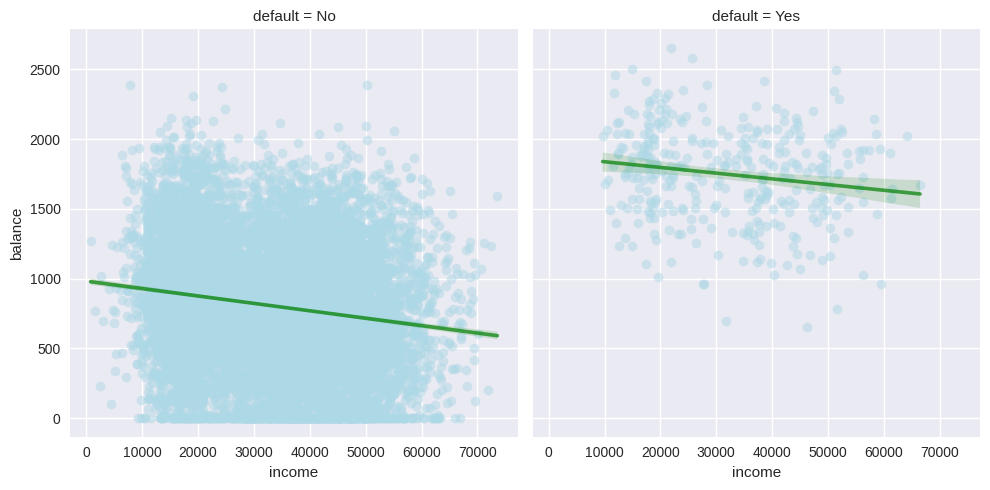

In [267]:
sns.lmplot(data=df,y='balance', x='income', col='default',scatter_kws={'alpha':0.5, 'color':'lightblue'},line_kws={'alpha':0.7,'color':'green'})

* Se nota un patron para ambos casos una pendiente negativa, en cuanto mas ingresos menor el saldo en la cuenta de credito

### Desafío 3: Modelación econométrica
* Recodifique las variables student y default para que adquieran atributos numéricos

In [268]:
rec_categoricas = pd.get_dummies(df[var_categoricas], prefix=['default', 'student'] ,drop_first=True)
rec_categoricas

,default_Yes,student_Yes
0,0,0
1,0,1
2,0,0
3,0,0
4,0,0
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,0,0


In [269]:
[print(rec_categoricas[i].value_counts()) for i in rec_categoricas]

0    9667
1     333
Name: default_Yes, dtype: int64
0    7056
1    2944
Name: student_Yes, dtype: int64


[None, None]

In [270]:
[print(df[i].value_counts()) for i in var_categoricas]

No     9667
Yes     333
Name: default, dtype: int64
No     7056
Yes    2944
Name: student, dtype: int64


[None, None]

In [271]:
df_bin = pd.concat([df, rec_categoricas], axis=1).copy()
df_bin.sample()

,default,student,balance,income,default_Yes,student_Yes
1806,No,No,725.1205,47549.20075,0,0


* Implemente el siguiente modelo econométrico:

![Descripción de la imagen](r3.png)

In [272]:
var_req3 = ['balance', 'income', 'student_Yes']
var_req3_join = '+'.join(var_req3)
var_req3_join

'balance+income+student_Yes'

In [273]:
m1_log = smf.logit(f'default_Yes ~ {var_req3_join}', df_bin).fit()

Optimization terminated successfully.
         Current function value: 0.078577
         Iterations 10


* A partir de este modelo, depúrelo y mantenga las principales características. Ejecute de nuevo el modelo y comente brevemente sobre el comportamiento de los atributos.

In [274]:
m1_log.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.462      
Dependent Variable: default_Yes      AIC:              1579.5448  
Date:               2023-01-22 21:54 BIC:              1608.3862  
No. Observations:   10000            Log-Likelihood:   -785.77    
Df Model:           3                LL-Null:          -1460.3    
Df Residuals:       9996             LLR p-value:      3.2575e-292
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     10.0000                                       
------------------------------------------------------------------
                 Coef.   Std.Err.    z     P>|z|   [0.025   0.975]
------------------------------------------------------------------
Intercept       -10.8690   0.4923 -22.0793 0.0000 -11.8339 -9.9042
balance           0.0057   0.0002  24.7365 0.0000   0.0053  0.0062
income            0.0000   0.0000   0.3698 0.7115  -0.0000  0.0000
student_Yes      -0.6468   0.2363  -2.7376 0.0062  -1.1098 -0.1837
==================================================================

"""

In [275]:
var_req3.remove('income')

In [276]:
var_req3

['balance', 'student_Yes']

In [277]:
var_req3_join = '+'.join(var_req3)
var_req3_join

'balance+student_Yes'

In [278]:
m2_log = smf.logit(f'default_Yes ~ {var_req3_join}', df_bin).fit()

Optimization terminated successfully.
         Current function value: 0.078584
         Iterations 10


In [279]:
def validar_modelos(modelo):    
    tmp_index = list(modelo.params.index)
    fit = pd.DataFrame({'Statistics': modelo.summary2().tables[0][2][0:],
    'Value': modelo.summary2().tables[0][3][0:]})
    print(f'''
parametros: {tmp_index}
{fit}
-------------------------------''')

In [280]:
validar_modelos(m1_log)
validar_modelos(m2_log)


parametros: ['Intercept', 'balance', 'income', 'student_Yes']
          Statistics        Value
0  Pseudo R-squared:        0.462
1               AIC:    1579.5448
2               BIC:    1608.3862
3    Log-Likelihood:      -785.77
4           LL-Null:      -1460.3
5       LLR p-value:  3.2575e-292
6             Scale:       1.0000
7                                
-------------------------------

parametros: ['Intercept', 'balance', 'student_Yes']
          Statistics        Value
0  Pseudo R-squared:        0.462
1               AIC:    1577.6816
2               BIC:    1599.3126
3    Log-Likelihood:      -785.84
4           LL-Null:      -1460.3
5       LLR p-value:  1.1893e-293
6             Scale:       1.0000
7                                
-------------------------------


Al eliminar la variable Income que mostro no ser significativa con una confianza de 95% observamos que el resultado es un modelo con mejor indicador BIC, es decir que en conjunto con sus demas indicadores tenemos la misma significancia del modelo pero con menos variables.

### Desafío 4: Entrenar
- A partir del modelo depurado, genere un modelo predictivo con las siguientes características:

* Genera subconjuntos de entrenamiento y pruebas, separando el 33% de la muestra en el conjunto de pruebas.

In [281]:
var_req3 

['balance', 'student_Yes']

In [282]:
X_train, X_test, y_train, y_test = train_test_split(df_bin.loc[:,var_req3],
                                     df_bin.loc[:,'default_Yes'], test_size=.33, 
                                     random_state=17708)

In [292]:
X_test

,balance,student_Yes
9938,319.602369,0
539,442.563302,0
451,987.142891,0
1105,1564.471411,1
8859,514.334987,1
...,...,...
2900,0.000000,0
2067,956.720392,1
3252,486.384424,0
9264,1168.570735,0


In [283]:
print(f'''
X_train: {X_train.shape}
X_test:  {X_test.shape}
y_train: {y_train.shape}
y_test   {y_test.shape}''')


X_train: (6700, 2)
X_test:  (3300, 2)
y_train: (6700,)
y_test   (3300,)


* Estandarice las matrices de atributos de entrenamiento y pruebas usando StandardScaler() ajustado solo sobre el conjunto deentrenamiento.
* Implemente el modelo sin alterar los hiper parámetros.
* Genere la predicción de las clases y de la probabilidad.

In [284]:
X_train_std = StandardScaler().fit_transform(X_train)
X_test_std = StandardScaler().fit_transform(X_test)
m3_std = LogisticRegression().fit(X_train_std, y_train)

In [285]:
m3_std.coef_

array([[ 2.77755888, -0.35623919]])

In [311]:
yhat_pr = m3_std.predict_proba(X_test_std)
yhat_pr[:20]

array([[9.99850165e-01, 1.49835105e-04],
       [9.99697873e-01, 3.02126916e-04],
       [9.93291566e-01, 6.70843423e-03],
       [9.23768722e-01, 7.62312778e-02],
       [9.99793598e-01, 2.06401871e-04],
       [9.99042900e-01, 9.57099693e-04],
       [9.94268194e-01, 5.73180576e-03],
       [9.94664233e-01, 5.33576713e-03],
       [9.98912924e-01, 1.08707595e-03],
       [8.26974873e-01, 1.73025127e-01],
       [9.99842802e-01, 1.57198419e-04],
       [9.82210526e-01, 1.77894743e-02],
       [9.98647017e-01, 1.35298258e-03],
       [9.97196188e-01, 2.80381239e-03],
       [9.99523000e-01, 4.76999913e-04],
       [7.13986832e-01, 2.86013168e-01],
       [9.99237245e-01, 7.62754785e-04],
       [9.99975799e-01, 2.42012020e-05],
       [9.94691496e-01, 5.30850431e-03],
       [9.95667377e-01, 4.33262271e-03]])

In [323]:
yhat = m3_std.predict(X_test_std)
yhat[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=uint8)

In [319]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, yhat)
confusion

array([[3178,   16],
       [  61,   45]])

In [325]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3194
           1       0.74      0.42      0.54       106

    accuracy                           0.98      3300
   macro avg       0.86      0.71      0.76      3300
weighted avg       0.97      0.98      0.97      3300



In [312]:
false_positive, true_positive, threshold = roc_curve(y_test, yhat_pr[:, 1])

Text(0.5, 0, 'Falsos Positivos')

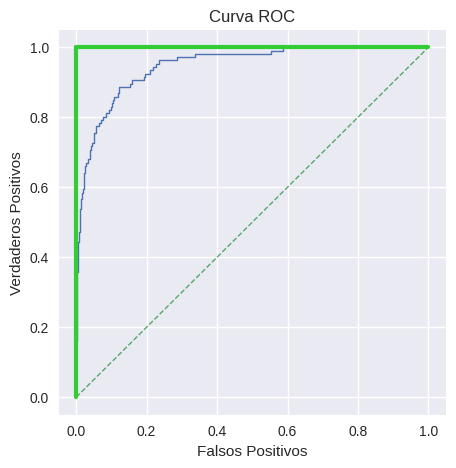

In [313]:
plt.title('Curva ROC')
plt.plot(false_positive, true_positive, lw=1)
plt.plot([0, 1], ls="--", lw=1)
plt.plot([0, 0], [1, 0] , c='limegreen', lw=3), plt.plot([1, 1] ,c='limegreen', lw=3)
plt.ylabel('Verdaderos Positivos')
plt.xlabel('Falsos Positivos')

In [317]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, yhat_pr[:, 1])

0.9482313535993195

* En base a los pasos, comente sobre el desempeño predictivo del modelo haciendo mención a todas las métricas calculadas y a la curva ROC.

In [322]:
from sklearn.metrics import accuracy_score
m1_acc = accuracy_score(y_test, yhat)
m1_acc - 0.5

0.4766666666666667

* En cuanto a los indicadores del modelo en acuraccy esta prediciendo el comportamiento de la variable en un 47% mas que un ejercicio aleatorio 50-50
* En el macro avg de la prueba f1 muestra un 76% lo cual  tambien es alto, a pesar de mostrar cierta dificultad para detectar los valores positivos, donde se sugiere buscar una muestra donde exista mayor cantidad de valores positivos (1).
* El area bajo de la curva es de 94% lo que nos muestra un alto poder predictivo.